# CPSC 422 - Assignment 3
## Question 3 - WalkSAT

Let N be the # of variables and C be the # of clauses in a Conjunctive Normal Form (CNF) statement.

For N fixed at 20, randomly generate 50 CNF 3SAT (3 literals per clause) problems for ratios of C/N from 1..10 (C=20..200). On each problem, terminate WalkSAT after 10 seconds. Compute:
* How many times WalkSAT terminated successfully at each set of 50 problems (each C/N ratio)
* Median number of flips for each set of 50 problems (each C/N ratio) where at least one problem terminated successfully

### Approach

The data on each C/N ratio (set of 50 runs) is stored as `.csv` files in `data/a3q3/`. This data was extracted using a custom shell script (see `walkstat.sh`). To use it, you must first download and install the implementation of WalkSAT from Henry Kautz [here](https://gitlab.com/HenryKautz/Walksat/-/tree/master/Walksat_v56). 

In `walksat.c`:
* Change the max number of runs (`numrun`) to a _very_ large number so it does not terminate before 10 seconds is up, OR
* Remove this constraint from `main()`

Place `walkstat.sh` inside the `Walksat_v56/` directory, and run it.

This will perform the random generation of 3SAT problems, and generate the data from each set of 50 problems.

### Necessary Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics

### Generate Aggregate Results

In [2]:
def getSummaryInfo():
    CNRatio = range(1,11)
    numSuccessful = []
    medianFlips = []
    for i in range(1,11):
        data = pd.read_csv(f'data/a3q3/{i}.csv')
        successes = list(data[data['numFlips']>-1]['numFlips'])
        numSuccesses = len(successes)
        numSuccessful.append(numSuccesses)
        if numSuccesses == 0:
            medianFlips.append(None)
        else:
            medianFlips.append(statistics.median(successes))          
        
    return pd.DataFrame(data={"C/N Ratio": CNRatio, "# Successful Terminations": numSuccessful, "Median Flips": medianFlips})

summaryInfo = getSummaryInfo()
print("Results:")
summaryInfo

Results:


,C/N Ratio,# Successful Terminations,Median Flips
0,1,50,2.0
1,2,50,4.0
2,3,50,9.0
3,4,41,28.0
4,5,14,50.0
5,6,4,52.0
6,7,0,NaN
7,8,0,NaN
8,9,0,NaN
9,10,0,NaN


### Plot Number of Successful Terminations versus C/N Ratio

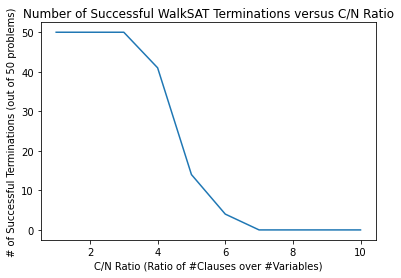

In [3]:
def plotNumSuccessfulTerminations(summaryInfo):
    plt.plot(summaryInfo['C/N Ratio'], summaryInfo['# Successful Terminations'])
    plt.xlabel("C/N Ratio (Ratio of #Clauses over #Variables)")
    plt.ylabel("# of Successful Terminations (out of 50 problems)")
    plt.title("Number of Successful WalkSAT Terminations versus C/N Ratio")
    plt.show()
plotNumSuccessfulTerminations(summaryInfo)

### Plot Median Number of Flips versus C/N Ratio

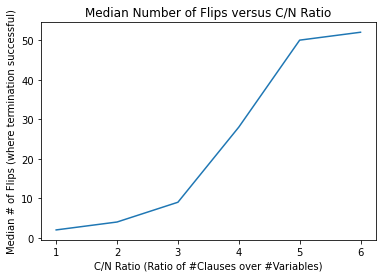

In [4]:
def plotMedianFlips(summaryInfo):
    plt.plot(summaryInfo['C/N Ratio'], summaryInfo['Median Flips'])
    plt.xlabel("C/N Ratio (Ratio of #Clauses over #Variables)")
    plt.ylabel("Median # of Flips (where termination successful)")
    plt.title("Median Number of Flips versus C/N Ratio")
    plt.show()

plotMedianFlips(summaryInfo)